In [76]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [77]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


((array([9130., 9130., 9130., 9130., 9130., 9130., 9130., 9130., 9130.,
         9130.]),
  array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
  <a list of 10 Patch objects>),
 0         13
 1         11
 2         14
 3         13
 4         10
 5         12
 6         10
 7          9
 8         12
 9          9
 10         9
 11         7
 12        10
 13        12
 14         5
 15         7
 16        16
 17         7
 18        18
 19        15
 20         8
 21         7
 22         9
 23         8
 24        14
 25        12
 26        12
 27        11
 28         6
 29         9
           ..
 896536    60
 896537    59
 896538    31
 896539    48
 896540    35
 896541    44
 896542    53
 896543    56
 896544    63
 896545    31
 896546    43
 896547    61
 896548    53
 896549    46
 896550    63
 896551    69
 896552    36
 896553    48
 896554    63
 896555    53
 896556    59
 896557    53
 896558    67
 896559    35
 896560    42
 896561    38
 8

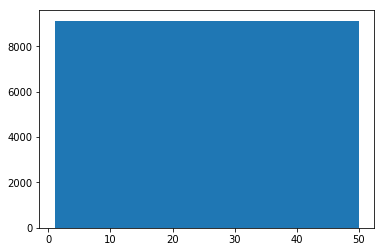

In [126]:
store1= df[df['store'] == 1]
plt.hist(store1['item']),store1['sales']

In [105]:
df.shape
df.columns


Index(['date', 'store', 'item', 'sales'], dtype='object')

In [107]:
dt.head()
dt.columns

Index(['id', 'date', 'store', 'item', 'sales'], dtype='object')

In [80]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_numeric(df['date'])
df.head()

,date,store,item,sales
0,1356998400000000000,1,1,13
1,1357084800000000000,1,1,11
2,1357171200000000000,1,1,14
3,1357257600000000000,1,1,13
4,1357344000000000000,1,1,10


In [81]:
Y=df['sales']
Y.head()

0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64

In [82]:
df.columns
dt.columns


Index(['date', 'store', 'item', 'sales'], dtype='object')

In [95]:
features=['date','store','item']
X=df[features]
x_test=dt[features]

In [96]:
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
dt['date'] = pd.to_datetime(dt['date']) 
dt['date'] = pd.to_numeric(dt['date'])

In [99]:
y_prediction = regressor.predict(x_test)
y_prediction

array([64.76670281, 64.777407  , 64.78811118, ..., 60.22168029,
       60.23238447, 60.24308866])

In [102]:
dt['sales']=y_prediction
dt['date']=pd.to_datetime(dt['date'])
dt.head()

,id,date,store,item,sales
0,0,2018-01-01,1,1,64.766703
1,1,2018-01-02,1,1,64.777407
2,2,2018-01-03,1,1,64.788111
3,3,2018-01-04,1,1,64.798815
4,4,2018-01-05,1,1,64.809520


In [113]:
sl=dt[['id','sales']]

sl.to_csv("solution.csv", index = False)
